# Simulation et Monte Carlo - Projet final
Marches aléatoires autosécantes
## 1 - Simulation de trajectoires en dimension 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def dimension_2_random_walk(X):
    U = np.random.choice([1,2,3,4])
    if U == 1:
        X[0] += 1
    elif U == 2:
        X[0] -= 1
    elif U == 3:
        X[1] += 1
    else:
        X[1] -= 1

On simule la réalisation d'une marche aléatoire pour une durée courte (n = 10), moyenne (n = 500), longue (n = 1000), très longue (n = 1000000).

In [2]:
n = 10
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

In [3]:
n = 100
X = [0,0]
trajectoire2 = []
trajectoire2.append(tuple(X))
longueurs2 = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire2:
        longueurs2.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire2.append(tuple(X))

In [4]:
n = 1000
X = [0,0]
trajectoire3 = []
trajectoire3.append(tuple(X))
longueurs3 = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire3:
        longueurs3.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire3.append(tuple(X))

In [5]:
n = 10000
X = [0,0]
trajectoire4 = []
trajectoire4.append(tuple(X))
longueurs4 = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire4:
        longueurs4.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire4.append(tuple(X))

In [18]:
n = 100000
X = [0,0]
trajectoire5 = []
trajectoire5.append(tuple(X))
longueurs5 = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire5:
        longueurs5.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire5.append(tuple(X))

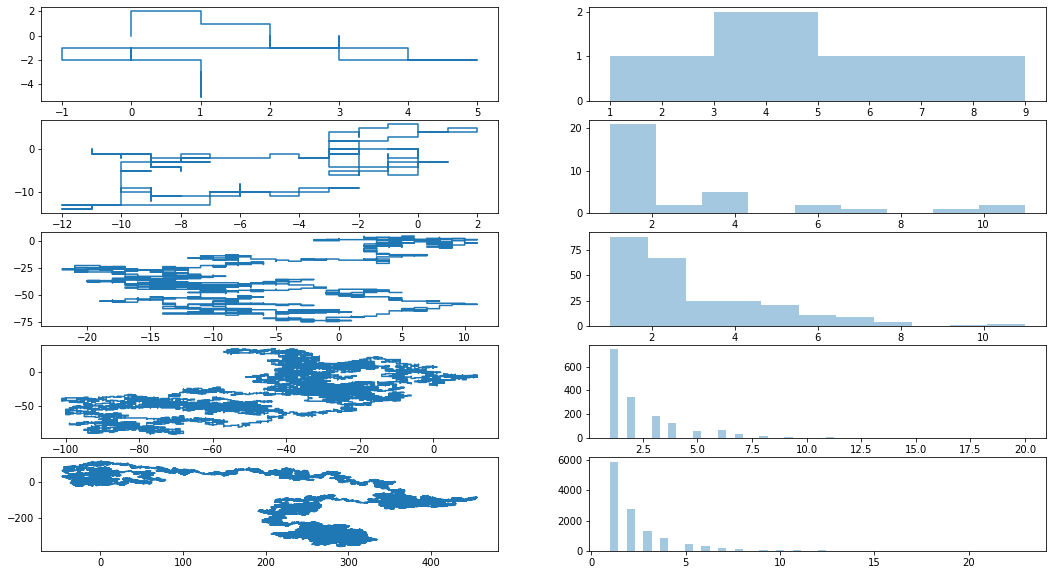

In [19]:
x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = list(), list(), list(), list(), list(), list(), list(), list(), list(), list()

for i in range(len(trajectoire)):
    x1.append(trajectoire[i][0])
    y1.append(trajectoire[i][1])

for i in range(len(trajectoire2)):
    x2.append(trajectoire2[i][0])
    y2.append(trajectoire2[i][1])

for i in range(len(trajectoire3)):
    x3.append(trajectoire3[i][0])
    y3.append(trajectoire3[i][1])

for i in range(len(trajectoire4)):
    x4.append(trajectoire4[i][0])
    y4.append(trajectoire4[i][1])

for i in range(len(trajectoire5)):
    x5.append(trajectoire5[i][0])
    y5.append(trajectoire5[i][1])

fig, axs = plt.subplots(5,2,figsize = (18,10))
axs[0,0].plot(x1,y1)
axs[1,0].plot(x2,y2)
axs[2,0].plot(x3,y3)
axs[3,0].plot(x4,y4)
axs[4,0].plot(x5,y5)
sns.distplot(np.array(longueurs)[np.where(np.array(longueurs)>0)], kde=False, ax=axs[0,1])
sns.distplot(np.array(longueurs2)[np.where(np.array(longueurs2)>0)], kde=False, ax=axs[1,1])
sns.distplot(np.array(longueurs3)[np.where(np.array(longueurs3)>0)], kde=False, ax=axs[2,1])
sns.distplot(np.array(longueurs4)[np.where(np.array(longueurs4)>0)], kde=False, ax=axs[3,1])
sns.distplot(np.array(longueurs5)[np.where(np.array(longueurs5)>0)], kde=False, ax=axs[4,1])
plt.show()

La loi des longueurs semble se stabiliser lorsque la longueur de la chaîne augmente. La loi de la longueur avant autosection resemble à une loi géométrique mais ce n'est a priori pas la même loi. En effet, le "succès" (l'arrêt de la chaîne) n'est pas toujours de probabilité constante à 1/4. Cette probabilité change avec l'état de la chaîne dans lequel on se trouve. Elle peut augmenter comme diminuer. Ainsi la loi conditionnelle de L (variable de la longueur) par rapport à X (état de la chaîne) n'est pas constante. 

La probabilité que L prenne de grande valeurs est a priori faible quand la chaîne est longue (il y a plus de points d'intersection possibles). Il nous sera donc difficile d'évaluer la probabilité que L soit inférieur à l quand l est moyen ou grand.


## 2 - Modification de la simulation en dimension d

Ici, au lieu de calculer une chaîne très longue et de recenser les longueurs, nous calculons plusieurs chaînes de taille plus petite. Ensuite, on recense les longueurs sur chacune d'elles. 

En ce qui concerne la simulation de la marche aléatoire, cela revient à faire du "Latin Hypercube sampling" k fois par étape (échantillonage par hypercube latin), et donc en tout k*(nombre de pas). En effet, on tire une seule fois une direction parmi les 2d disponibles, et ce k fois. Il s'agit d'une méthode de stratification lorsque l'on est en multivarié.

Pour chaque trajectoire, étant donné que la permutation implique un tirage "simultané", la probabilité de tirer une direction en particulier reste la même. Ainsi les marches ne voient pas leur comportement se modifier. La démarche est donc valide.



Cette méthode a l'avantage de pouvoir capturer plus facilement les valeurs "un peu grande" prises par L. Toutefois, cela ne résout pas le problème des très grandes valeurs, car il faut nécessairement des chaînes très grandes. 

### Simulation par stratification

On veut $N$ trajectoires. On sait que $\forall i \in [[1;N]],  U_i_t$

\begin{equation}

E = mc^2

\end{equation}



In [21]:
import numpy as np
import copy

def random_walk_n_dimensions(d,k,nbriter):
    ''' Retourne une liste de d'arrays d'arrays. Chaque élément de la grosse liste est une trajectoire simulée par la méthode de la question 2 '''
    N = 2*d*k # Nombre de trajectoires

    trajectoires = [] # Liste des trajectoires

    trajectoires.append([]) # On initialise la liste
    trajectoires[0].append(np.zeros(d)) # On initialise la 1e trajectoire avec l'état de départ (que des 0)
    trajectoires *= N # On réplique cet élément pour avoir les N trajectoires initialisées dans la grande liste.

    for z in range(nbriter): # Les marches aléatoires auront une longueur nbriter. On se positionne à chaque étape.


        # Selon la méthode de la question 2, nous allons d'abord créer les directions avant de les attribuer.

        directions_positives = [] # On crée toutes les directions positives
        for i in range(d): # Pour chaque dimension
            directions_positives.append(np.zeros(d)) # On ajoute la direction où on se déplace de +1 dans la direction i
            directions_positives[i][i] = 1

        directions_positives *= k # Comme on tire k fois chaque direction possible, on réplique k fois la liste des directions.

        directions_negatives = [] # On fait la même chose avec les directions négatives
        for i in range(d):
            directions_negatives.append(np.zeros(d))
            directions_negatives[i][i] = -1

        directions_negatives *= k

        directions = list(np.random.permutation(np.array(directions_positives + directions_negatives))) # On concatène toutes les directions et on mélange.

        for i in range(N): # Enfin, à chaque direction i, on additionne la direction pour se faire déplacer l'état.
            copie = copy.deepcopy(trajectoires[i]) # On utilise copy.deepcopy pour éviter les problèmes de doublons sur les autres trajectoires.
            copie.append(copie[-1]+directions[i])
            trajectoires[i] = copie
    
    for j in range(N):
        trajectoires[j] = np.array(trajectoires[j]) # On convertit toutes les trajectoires en arrays, c'est plus facile à plotter.

    return trajectoires

In [41]:
rwalk = random_walk_n_dimensions(2,2,10000)

import matplotlib.pyplot as plt

fig0, ax0 = plt.subplots()

ax0.plot(rwalk[0][:,1],rwalk[0][:,0])

plt.show()

KeyboardInterrupt: 

In [ ]:
def autosections(d,k,nbriter):
    rwalk2 = random_walk_n_dimensions(d,k,nbriter)
    resultat = []
    for i in range(2*1*2):
        longueurs = []
        longueur = 0
        for index, elt in enumerate(rwalk2[i][1:,:]):
            if elt in rwalk2[i][:index,:]:
                longueurs.append(longueur) # On enregistre la longueur parcourue
                longueur = 0 # On réinitialise la longueur
            else:
                longueur += 1
        resultat.append(longueurs)
        longueurs = 0
    return resultat


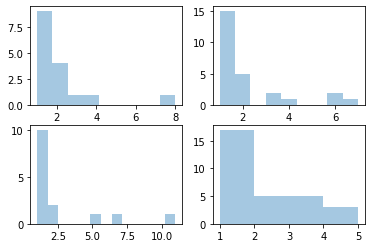

In [36]:
test = autosections(2,2,20)

fig2, axs2 = plt.subplots(2,2)

sns.distplot(np.array(test[0])[np.where(np.array(test[0])>0)], kde=False, ax=axs2[0,0])
sns.distplot(np.array(test[1])[np.where(np.array(test[1])>0)], kde=False, ax=axs2[0,1])
sns.distplot(np.array(test[2])[np.where(np.array(test[2])>0)], kde=False, ax=axs2[1,0])
sns.distplot(np.array(test[3])[np.where(np.array(test[3])>0)], kde=False, ax=axs2[1,1])
plt.show()

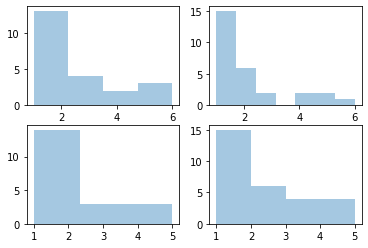

In [37]:
test = autosections(2,2,100)

fig2, axs2 = plt.subplots(2,2)

sns.distplot(np.array(test[0])[np.where(np.array(test[0])>0)], kde=False, ax=axs2[0,0])
sns.distplot(np.array(test[1])[np.where(np.array(test[1])>0)], kde=False, ax=axs2[0,1])
sns.distplot(np.array(test[2])[np.where(np.array(test[2])>0)], kde=False, ax=axs2[1,0])
sns.distplot(np.array(test[3])[np.where(np.array(test[3])>0)], kde=False, ax=axs2[1,1])
plt.show()

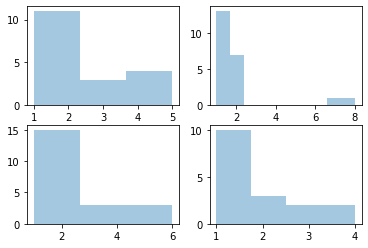

In [38]:
test = autosections(2,2,1000)

fig2, axs2 = plt.subplots(2,2)

sns.distplot(np.array(test[0])[np.where(np.array(test[0])>0)], kde=False, ax=axs2[0,0])
sns.distplot(np.array(test[1])[np.where(np.array(test[1])>0)], kde=False, ax=axs2[0,1])
sns.distplot(np.array(test[2])[np.where(np.array(test[2])>0)], kde=False, ax=axs2[1,0])
sns.distplot(np.array(test[3])[np.where(np.array(test[3])>0)], kde=False, ax=axs2[1,1])
plt.show()

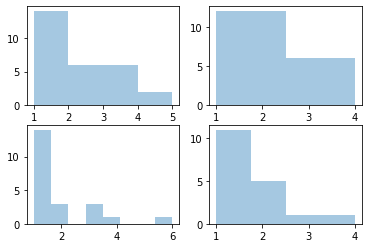

In [40]:
test = autosections(2,2,10000)

fig2, axs2 = plt.subplots(2,2)

sns.distplot(np.array(test[0])[np.where(np.array(test[0])>0)], kde=False, ax=axs2[0,0])
sns.distplot(np.array(test[1])[np.where(np.array(test[1])>0)], kde=False, ax=axs2[0,1])
sns.distplot(np.array(test[2])[np.where(np.array(test[2])>0)], kde=False, ax=axs2[1,0])
sns.distplot(np.array(test[3])[np.where(np.array(test[3])>0)], kde=False, ax=axs2[1,1])
plt.show()

## Description du problème

On définit :
* $(X_t)_{t \geq 0}$ est une marche aléatoire dans $\mathbb{Z}^d$ d'origine $(0,..,0)$.
* $(L_i)_{i \geq 0}$ est la longueur parcourue depuis la dernière "autosection" sur la même marche aléatoire $(X_t)_{t \geq 0}$. On appelle "autosection" l'événement $AS_t = [X_t \in \{X_s\}_{s < t}]$. Pour $i$ donné, $L_i$ est donc la longueur parcourue entre la $i-1^{\text{ème}}$ et la $i^{\text{ème}}$ autosection réalisées.

On peut ainsi noter que :
* **Le caractère iid des $(L_i)_{i \geq 0}$ n'est pas établi**, il est difficile de montrer que les variables ont la même distribution et qu'elles sont indépendantes. On peut ainsi se placer dans 2 cas distincts.
    * Soit on émet l'hypothèse qu'elles sont iid et on peut appliquer les méthodes de Monte Carlo sur la même trajectoire de $(X_t)_{t \geq 0}$. L'approche est 

    $$
    \forall i \geq 0, \quad \mathbb{P}(L=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{j})
    $$

    * Soit on doit réaliser $N$ trajectoires différentes, pour avoir $N$ réalisations différentes de la suite $(L_i)_{i \geq 0}$, et l'on applique les méthodes de Monte Carlo sur le regroupement des $N$ $L_i$, pour $i$ fixé. L'approche est alors

    $$
    \forall i \geq 0, \quad \mathbb{P}(L_i=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L_i)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{i,j})
    $$

* $(X_t)_{t \geq 0}$ est une somme de "directions" mutuellement indépendantes, de loi uniforme sur l'ensemble des directions possibles : $\forall t \geq 0, X_t = \sum_{i=1}^{t} U_i$ où

    $$
    \begin{align*}

    \\
    \forall i \geq 0 : \quad U_i \overset{\text{i.i.d.}}{\sim} \cal{U}(\underbrace{\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, \cdots , \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ \vdots \\ 0 \\ -1 \end{bmatrix}}_\cal{D})

    \\
    \end{align*}

    $$

    Ainsi la méthode classique pour simuler de telles marches aléatoires est de simuler $(U_t)_{t \geq 0}$ et de poser $(X_t)_{t \geq 0} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$.

* On peut montrer que :
    $$
    \begin{align}
    L_0 & = \sum_{t=1}^{\infty} \prod_{j=1}^{t} \mathbb{1}_{\overline{\{X_j\}}}(X_t)

    \\

    \forall i \geq 1, \quad L_i &= \sum_{t=(\underbrace{\sum_{k=0}^{i-1} L_k}_{\sigma_i})+1}^{\infty} \prod_{j=(\sum_{k=0}^{i-1} L_k)+1} \mathbb{1}_{\overline{\{0\}}}(\sum_{a=1}^{t-j} U_{a+j})
    \end{align}
    $$
    où $\sigma_i$ est le temps d'attente de la $i^{\text{ème}}$ autosection.

* Ainsi déterminer de manière analytique la distribution et l'indépendance des $(L_i)_{i \geq 0}$ peut s'avérer compliqué. Nous allons recourrir à des méthodes de Monte Carlo et des tests pour en connaître la plausibilité.
    1. On simule N trajectoires à l'aide d'une boucle while pour avoir un même nombre de fois ($N$ fois) chaque $L_i$.
    2. On regroupe les $L_{i,j}$ par i.
    3. On teste l'indépendance et l'identité en loi.

<br />

<br />


## Simulation par stratification

On veut $N$ trajectoires. On sait que $$\begin{align*}  \forall (i,t) \in [[1;N]], \, \mathbb{N} : \quad U_{it} \sim \cal{U}(\underbrace{\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, \cdots , \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ \vdots \\ 0 \\ -1 \end{bmatrix}}_\cal{D}) \end{align*}$$ 

On note $\cal{D}_k$ l'ensemble ordonné contenant $k$ fois chaque élément de D, avec $k$ tel que $2dk = N$.

On simule chaque trajectoire $i \in [[1:N]]$ en faisant
$$
\begin{align*}
(X_{it})_{t \geq 0} \: = \: (\sum_{j=1}^{t} perm_j(\cal{D}_k)_i)_{t \geq 0}
\end{align*}
$$

où $perm_j(D_k)$ est la $j^{\text{ème}}$ permutation de $\cal{D_k}$, et $perm_j(\cal{D}_k)_i$ sont $i^{\text{ème}}$ élément.

On veut maintenant savoir si $\forall t \geq 0 , \sum_{j=1}^{t} perm_j(\cal{D}_k)_i$ a la même loi que $\sum_{j=1}^{t} U_{ij}$. On peut alors se cantonner à montrer que 

$$
\begin{align*}
\\
\forall j \in [[1;t]], \begin{cases} perm_j(\cal{D}_k)_i \sim \cal{U}(\cal{D}) \\ \text{Les permutations sont mutuellement indépendantes} \end{cases}
\\
\\
\end{align*}
$$

Par construction, la 2e affirmation est vraie. Quant à la 1e :

$$
\begin{align*}
\forall v \in \cal{D}, \quad \mathbb{P}(perm_j(\cal{D}_k)_i \, = \, v) & = \frac{\text{Nombre de cas favorables}}{\text{Nombre de cas possibles}} \\ \\

&= \frac{\overbrace{k}^{\text{Nombre de vecteurs} \\ \text{prenant la valeur de v}} \times \overbrace{(2dk - 1)!}^{\text{Nombre de permutations sur les 2dk-1} \\ \text{valeurs, après avoir fixé le rang i}}}{(2dk)!} \\ \\

&= \frac{1}{2d}

\\
\end{align*}
$$

<br />

Elle est aussi vraie. On en conclue que l'approche par stratification (Latin Hypercube) est valide.